<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab3/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Предварительная обработка признаков. Часть - 1

##Что с признаками может быть не так

###Теория

Предварительная обработка признаков, также известная как препроцессинг данных, представляет собой важную фазу в анализе данных и машинном обучении, которая включает в себя подготовку и преобразование данных перед их вводом в модель. Целью предварительной обработки является создание подходящего и чистого набора данных, который позволяет алгоритмам обучения находить более точные и интерпретируемые закономерности.

Процессы предварительной обработки включают в себя преобразование, агрегацию, сокращение размерности и многое другое, чтобы подготовить данные к дальнейшему анализу или использованию в моделях машинного обучения. Это включает в себя стандартизацию данных, обработку пропущенных значений, кодирование категориальных переменных и масштабирование.

Работа с "сырыми" или необработанными данными может привести к разнообразным проблемам и искажениям результатов анализа. Важно осознать, что в реальных условиях данные скорее всего будут содержать ошибки, выбросы, пропущенные значения и разные форматы. Некорректно обработанные данные могут исказить выводы и даже привести к некорректным решениям.

Проблемы при анализе "сырых" данных включают:

* Несогласованность: Разные единицы измерения, форматы дат и другие несоответствия между данными.
* Выбросы: Аномальные значения могут исказить статистику и метрики.
* Пропущенные значения: Отсутствующие данные могут внести смещение и уменьшить точность анализа.
* Шум: Непредсказуемая или случайная ошибка, которая может существенно повлиять на результаты.
* Категориальные переменные: Необработанные категориальные данные не могут быть использованы непосредственно в большинстве моделей машинного обучения.

Поэтому важно понимать, что предварительная обработка является неотъемлемой частью подготовки данных, которая позволяет привести данные к более подходящему для анализа и моделирования виду, снизить искажения и улучшить результаты дальнейшего анализа.

###Пример

In [ ]:
!pip install scikit-learn

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("/content/cvss_2.json")
df

,Name,Class,Score,AV,AC,AU,C,I,A
0,CVE-2021-1942,HIGH,7.2,L,L,N,C,C,C
1,CVE-2021-1950,HIGH,7.2,L,L,N,C,C,C
2,CVE-2021-30328,HIGH,7.8,N,L,N,N,N,C
3,CVE-2021-30329,HIGH,7.8,N,L,N,N,N,C
4,CVE-2021-30331,LOW,2.1,L,L,N,P,N,N
...,...,...,...,...,...,...,...,...,...
48364,CVE-2022-37965,MEDIUM,NaN,N,H,N,N,N,C
48365,CVE-2022-37955,MEDIUM,NaN,L,L,S,C,C,C
48366,CVE-2022-38006,HIGH,NaN,N,L,N,C,N,N
48367,CVE-2022-37956,MEDIUM,NaN,L,L,S,C,C,C


В этой части мы поработаем с:

* Выбросами и аномалиями
* Дубликатами
* Обработкой пропущенных значений



##Обработка пропущенных значений


###Теория

Обработка пропущенных значений

Пропущенные значения (или NaN - Not a Number) - это отсутствующие данные в датасете. Они могут возникнуть по разным причинам, таким как ошибки при записи, отсутствие информации и т.д. Обработка пропущенных значений является важным этапом в анализе данных, так как некорректно обработанные или игнорированные пропуски могут исказить результаты анализа и моделирования. Существует несколько подходов для обработки пропущенных значений.

1. Удаление пропущенных значений:
Самым простым способом является удаление строк или столбцов, содержащих пропущенные значения. Это может быть эффективным, если пропущенные значения составляют небольшую часть данных, но при этом может привести к потере информации.

2. Заполнение пропущенных значений:
Этот подход включает в себя замену пропущенных значений каким-либо другим значением. Например, можно заменить пропущенные значения средним или медианой в данном столбце. Это подходит, когда удаление пропущенных значений не является приемлемым.

3. Интерполяция:
Интерполяция - это метод, при котором пропущенные значения заполняются значениями, вычисленными на основе соседних значений. Этот метод может быть особенно полезным для временных рядов или данных с некоторым порядком.

4. Создание новой категории "Пропущено":
В некоторых случаях, создание новой категории для пропущенных значений может быть логичным. Например, если у нас есть столбец "Тип автомобиля" и пропущенное значение может означать "неизвестный тип".

5. Использование моделей машинного обучения:
Модели машинного обучения могут быть использованы для предсказания пропущенных значений на основе остальных данных. Однако это может быть более сложным и ресурсоемким подходом.

###Пример удаления пропущенных значений

In [41]:
df = pd.read_json("/content/cvss_2.json")
"""
Тут му можем увидеть множество NaN'ов в колонке Score
"""

df

,Name,Class,Score,AV,AC,AU,C,I,A
0,CVE-2021-1942,HIGH,7.2,L,L,N,C,C,C
1,CVE-2021-1950,HIGH,7.2,L,L,N,C,C,C
2,CVE-2021-30328,HIGH,7.8,N,L,N,N,N,C
3,CVE-2021-30329,HIGH,7.8,N,L,N,N,N,C
4,CVE-2021-30331,LOW,2.1,L,L,N,P,N,N
...,...,...,...,...,...,...,...,...,...
48364,CVE-2022-37965,MEDIUM,NaN,N,H,N,N,N,C
48365,CVE-2022-37955,MEDIUM,NaN,L,L,S,C,C,C
48366,CVE-2022-38006,HIGH,NaN,N,L,N,C,N,N
48367,CVE-2022-37956,MEDIUM,NaN,L,L,S,C,C,C


In [11]:

# Удаляем строки с пропущенными значениями
df_cleaned = df.dropna()
"""
Все строки, где Score являлся NaN'ом
были удалены
"""
df_cleaned

,Name,Class,Score,AV,AC,AU,C,I,A
0,CVE-2021-1942,HIGH,7.2,L,L,N,C,C,C
1,CVE-2021-1950,HIGH,7.2,L,L,N,C,C,C
2,CVE-2021-30328,HIGH,7.8,N,L,N,N,N,C
3,CVE-2021-30329,HIGH,7.8,N,L,N,N,N,C
4,CVE-2021-30331,LOW,2.1,L,L,N,P,N,N
...,...,...,...,...,...,...,...,...,...
6380,CVE-2018-6308,HIGH,7.5,N,L,N,P,P,P
6381,CVE-2018-4835,MEDIUM,5.0,N,L,N,P,N,N
6382,CVE-2018-4836,MEDIUM,6.5,N,L,S,P,P,P
6383,CVE-2018-4837,MEDIUM,5.0,N,L,N,N,N,P


###Заполнение пропущенных значений

In [12]:
"""
Так как у категориальных переменных нет среднего и медианы,
их надо или заменить с помощью моды, или преобразовать в числа
"""
# Заполняем пропущенные значения средним столбцов
df_filled_mean = df.fillna(df.mean())

df_filled_mean

<ipython-input-12-75cbcfd68fe2>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean = df.fillna(df.mean())


,Name,Class,Score,AV,AC,AU,C,I,A
0,CVE-2021-1942,HIGH,7.200000,L,L,N,C,C,C
1,CVE-2021-1950,HIGH,7.200000,L,L,N,C,C,C
2,CVE-2021-30328,HIGH,7.800000,N,L,N,N,N,C
3,CVE-2021-30329,HIGH,7.800000,N,L,N,N,N,C
4,CVE-2021-30331,LOW,2.100000,L,L,N,P,N,N
...,...,...,...,...,...,...,...,...,...
48364,CVE-2022-37965,MEDIUM,5.499468,N,H,N,N,N,C
48365,CVE-2022-37955,MEDIUM,5.499468,L,L,S,C,C,C
48366,CVE-2022-38006,HIGH,5.499468,N,L,N,C,N,N
48367,CVE-2022-37956,MEDIUM,5.499468,L,L,S,C,C,C


In [13]:
# Заполняем пропущенные значения медианой столбцов
df_filled_median = df.fillna(df.median())

df_filled_median

<ipython-input-13-f9b93f21be58>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_median = df.fillna(df.median())


,Name,Class,Score,AV,AC,AU,C,I,A
0,CVE-2021-1942,HIGH,7.2,L,L,N,C,C,C
1,CVE-2021-1950,HIGH,7.2,L,L,N,C,C,C
2,CVE-2021-30328,HIGH,7.8,N,L,N,N,N,C
3,CVE-2021-30329,HIGH,7.8,N,L,N,N,N,C
4,CVE-2021-30331,LOW,2.1,L,L,N,P,N,N
...,...,...,...,...,...,...,...,...,...
48364,CVE-2022-37965,MEDIUM,5.0,N,H,N,N,N,C
48365,CVE-2022-37955,MEDIUM,5.0,L,L,S,C,C,C
48366,CVE-2022-38006,HIGH,5.0,N,L,N,C,N,N
48367,CVE-2022-37956,MEDIUM,5.0,L,L,S,C,C,C


In [14]:
# Заполняем пропущенные значения модой столбцов
df_filled_mode = df.fillna(df["Score"].mode()[0])
"""
Мода возвращает объект Series, так как
значений моды может быть несколько
"""
df_filled_mode

,Name,Class,Score,AV,AC,AU,C,I,A
0,CVE-2021-1942,HIGH,7.2,L,L,N,C,C,C
1,CVE-2021-1950,HIGH,7.2,L,L,N,C,C,C
2,CVE-2021-30328,HIGH,7.8,N,L,N,N,N,C
3,CVE-2021-30329,HIGH,7.8,N,L,N,N,N,C
4,CVE-2021-30331,LOW,2.1,L,L,N,P,N,N
...,...,...,...,...,...,...,...,...,...
48364,CVE-2022-37965,MEDIUM,4.3,N,H,N,N,N,C
48365,CVE-2022-37955,MEDIUM,4.3,L,L,S,C,C,C
48366,CVE-2022-38006,HIGH,4.3,N,L,N,C,N,N
48367,CVE-2022-37956,MEDIUM,4.3,L,L,S,C,C,C


###Интерполяция

In [15]:
"""
Аналогично не работает для категориальных значений, надо преобразовывать
"""
# Применяем линейную интерполяцию для заполнения пропущенных значений
df_interpolated = df.interpolate()

df_interpolated

,Name,Class,Score,AV,AC,AU,C,I,A
0,CVE-2021-1942,HIGH,7.2,L,L,N,C,C,C
1,CVE-2021-1950,HIGH,7.2,L,L,N,C,C,C
2,CVE-2021-30328,HIGH,7.8,N,L,N,N,N,C
3,CVE-2021-30329,HIGH,7.8,N,L,N,N,N,C
4,CVE-2021-30331,LOW,2.1,L,L,N,P,N,N
...,...,...,...,...,...,...,...,...,...
48364,CVE-2022-37965,MEDIUM,5.0,N,H,N,N,N,C
48365,CVE-2022-37955,MEDIUM,5.0,L,L,S,C,C,C
48366,CVE-2022-38006,HIGH,5.0,N,L,N,C,N,N
48367,CVE-2022-37956,MEDIUM,5.0,L,L,S,C,C,C


Пример с заменой при помощи моделей машинного обучения мы пока что опустим

##Выбросы и аномалии

### Теория

Выбросы и аномалии в данных представляют собой значения, которые существенно отличаются от остальных данных в выборке. Они могут возникать по разным причинам и могут значительно исказить результаты анализа данных и модели машинного обучения.

Выбросы (Outliers) - значения, которые находятся далеко от большинства других значений в выборке. Выбросы могут быть как случайными ошибками, так и настоящими аномалиями в данных.

Аномалии (Anomalies) - значения, которые считаются необычными или аномальными в контексте задачи. Аномалии могут быть как выбросами, так и более сложными нестандартными паттернами, которые выходят за рамки ожидаемого поведения данных.

####Причины появления

Ошибка измерения: Выбросы могут возникнуть из-за ошибок в сборе данных, датчиках или оборудовании.

Естественные аномалии: Некоторые аномалии являются естественными и могут представлять интерес для анализа, например, в медицинских данных.

####Последствия выбросов и аномалий

Выбросы могут исказить статистику данных, такую как среднее и стандартное отклонение.

В моделях машинного обучения выбросы могут влиять на обучение и снижать производительность моделей.

####Обнаружение и обработка

Для обнаружения выбросов и аномалий можно использовать различные статистические и машинно-обучаемые методы.
Обработка выбросов может включать удаление выбросов, замену их средними значениями или интерполяцию.
В некоторых случаях аномалии могут быть оставлены без изменений, если они представляют интерес для исследования.

#### Методы поиска выбросов и аномалий

Использование пороговых значений и квантилей для определения выбросов.
Применение методов машинного обучения, таких как изоляционный лес (Isolation Forest) и метод опорных векторов (One-Class SVM), для обнаружения аномалий.
Визуальный анализ данных с использованием графиков и диаграмм.
Обработка выбросов и аномалий зависит от конкретной задачи и данных. Важно учитывать их наличие при анализе и моделировании данных, чтобы получать более точные и надежные результаты.

### Пример

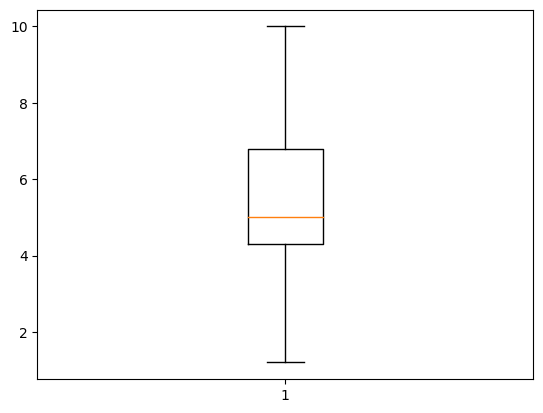

In [16]:
df = df.dropna()
plt.boxplot(df["Score"])
#Выбросов нет
plt.show()

In [17]:
#Посмотрим статистику без выброса
df["Score"].describe()

count    6385.000000
mean        5.499468
std         1.817332
min         1.200000
25%         4.300000
50%         5.000000
75%         6.800000
max        10.000000
Name: Score, dtype: float64

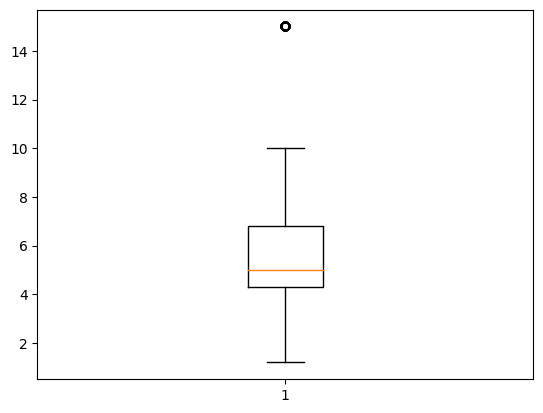

In [18]:
#Добавим выбросов
df.loc[0:100, "Score"] = 15
plt.boxplot(df["Score"])
#Выброс есть
plt.show()

In [19]:
"""
Можно увидеть, что статистика искажается, из-за присутствия выбросов
В нашем случае незначительно, но представьте, если выбросов будет несколько тысяч
"""
df["Score"].describe()

count    6385.000000
mean        5.644338
std         2.156742
min         1.200000
25%         4.300000
50%         5.000000
75%         6.800000
max        15.000000
Name: Score, dtype: float64

In [20]:
mean = df["Score"].mean()
std_deviation = df["Score"].std()
threshold = 3 * std_deviation

# Идентифицируем выбросы
outliers = [x for x in df["Score"] if abs(x - mean) > threshold]

# Выводим результаты
print("Среднее значение данных:", mean)
print("Стандартное отклонение данных:", std_deviation)
print("Потенциальные выбросы:", outliers)

Среднее значение данных: 5.644338292873923
Стандартное отклонение данных: 2.156742423315189
Потенциальные выбросы: [15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]


##Дубликаты

###Теория

Дубликаты данных - это строки (записи) в наборе данных, которые идентичны друг другу во всех или большинстве признаков. Дубликаты могут возникнуть по разным причинам, таким как технические ошибки, некорректное объединение данных из разных источников или случайное дублирование записей.

####Почему дубликаты важны?

Искажение статистики: Наличие дубликатов может привести к искажению статистических метрик и характеристик данных.

Неправильное обучение моделей: При обучении моделей машинного обучения дубликаты могут вызвать переобучение и привести к низкой обобщающей способности модели.

Потеря ресурсов: Дубликаты могут занимать дополнительное место в хранилище данных и увеличивать нагрузку при их обработке.

####Как обнаруживать дубликаты?

Поиск полных дубликатов: Это наиболее очевидный способ, при котором строки сравниваются на идентичность. Если все признаки в двух строках одинаковы, то это полный дубликат.

Поиск частичных дубликатов: Иногда дубликаты могут содержать небольшие отличия в значениях признаков. Для этого можно использовать различные методы вычисления сходства между строками, такие как вычисление расстояний между векторами признаков.

####Что делать с дубликатами?

* Удаление дубликатов: Простейший способ управления дубликатами - удалить все, кроме одной из копий. Это подходит, когда дубликаты несущественны.
* Объединение дубликатов: В некоторых случаях более разумным решением может быть объединение данных из дубликатов, если они содержат дополнительную информацию.
* Изоляция дубликатов: Вместо удаления или объединения можно создать отдельный признак, указывающий на наличие дубликатов в данных. Это позволяет сохранить информацию о дубликатах, но не учитывать их в анализе.
* Управление дубликатами данных является важной частью процесса подготовки данных перед анализом и обучением моделей машинного обучения. Независимо от выбранного метода, целью является обеспечение чистоты данных и правильности результатов анализа.

###Пример

In [21]:
df.describe()

,Score
count,6385.000000
mean,5.644338
std,2.156742
min,1.200000
25%,4.300000
50%,5.000000
75%,6.800000
max,15.000000


In [22]:
#Создадим дубликаты
df = pd.concat((df, df.loc[0:100]))

In [23]:
#Снова видим незначительное искажение статистики
df.describe()

,Score
count,6486.000000
mean,5.790025
std,2.433324
min,1.200000
25%,4.300000
50%,5.000000
75%,7.100000
max,15.000000


In [24]:
df

,Name,Class,Score,AV,AC,AU,C,I,A
0,CVE-2021-1942,HIGH,15.0,L,L,N,C,C,C
1,CVE-2021-1950,HIGH,15.0,L,L,N,C,C,C
2,CVE-2021-30328,HIGH,15.0,N,L,N,N,N,C
3,CVE-2021-30329,HIGH,15.0,N,L,N,N,N,C
4,CVE-2021-30331,LOW,15.0,L,L,N,P,N,N
...,...,...,...,...,...,...,...,...,...
96,CVE-2022-26417,MEDIUM,15.0,N,M,N,P,P,P
97,CVE-2022-26419,MEDIUM,15.0,N,M,N,P,P,P
98,CVE-2022-27177,HIGH,15.0,N,L,N,P,P,P
99,CVE-2022-27534,HIGH,15.0,N,L,N,P,P,P


In [25]:
#Удаляем дубликаты
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,Name,Class,Score,AV,AC,AU,C,I,A
0,CVE-2021-1942,HIGH,15.0,L,L,N,C,C,C
1,CVE-2021-1950,HIGH,15.0,L,L,N,C,C,C
2,CVE-2021-30328,HIGH,15.0,N,L,N,N,N,C
3,CVE-2021-30329,HIGH,15.0,N,L,N,N,N,C
4,CVE-2021-30331,LOW,15.0,L,L,N,P,N,N
...,...,...,...,...,...,...,...,...,...
6380,CVE-2018-6308,HIGH,7.5,N,L,N,P,P,P
6381,CVE-2018-4835,MEDIUM,5.0,N,L,N,P,N,N
6382,CVE-2018-4836,MEDIUM,6.5,N,L,S,P,P,P
6383,CVE-2018-4837,MEDIUM,5.0,N,L,N,N,N,P


## Масштабирование признаков

### Числовые признаки (Теория)

Масштабирование числовых признаков — это процесс приведения всех числовых признаков к одному и тому же масштабу. Это часто делается перед тем, как применять многие алгоритмы машинного обучения, потому что многие из них чувствительны к масштабу признаков.

Масштабирование числовых признаков — это процесс приведения всех числовых признаков к одному и тому же масштабу. Это часто делается перед тем, как применять многие алгоритмы машинного обучения, потому что многие из них чувствительны к масштабу признаков.

**Примеры масштабирования:**

1. **Минимаксное масштабирование (Min-max scaling)**: Это преобразование приводит все признаки к масштабу между 0 и 1.

2. **Стандартизация (Z-score normalization)**: Это преобразование делает так, чтобы признак имел среднее значение равное 0 и стандартное отклонение равное 1.

**Для чего оно нуно:**

2. **Чувствительность к масштабу**: Алгоритмы, такие как k-ближайших соседей (kNN) или SVM с RBF ядром, чрезмерно чувствительны к масштабированию признаков. Если один признак имеет масштаб в тысячах, а другой в диапазоне от 0 до 1, первый признак будет доминировать.

3. **Регуляризация**: В алгоритмах, использующих регуляризацию (например, Ridge или Lasso регрессия), штраф применяется к коэффициентам модели. Если признаки имеют разный масштаб, регуляризация будет воздействовать на них по-разному.

4. **Интерпретируемость**: В некоторых случаях масштабирование может упростить интерпретацию важности признаков.

Хорошей практикой - является

In [31]:
# получаем числовые признаки
num_features = df.select_dtypes(include=['float64']).columns

num_features

Index(['Score'], dtype='object')

In [33]:
df.Score.unique() # первичные уникальные значения в числовом призанке

array([15. ,  4. ,  5. ,  2.1,  7.5,  6.8,  4.3,  3.5, 10. ,  4.6,  7.2,
        6.4,  9. ,  6.5,  5.5,  5.8,  3.6,  6. ,  4.9,  2.6,  4.4,  6.2,
        8.5,  5.1,  7.9,  8.3,  3.3,  7.8,  4.8,  6.1,  6.9,  5.2,  2.7,
        7.7,  1.9,  9.3,  5.7,  7.6,  8. ,  4.7,  7.1,  1.2,  2.9,  9.4,
        6.6,  4.1,  6.3,  5.6,  3.7])

In [30]:
from sklearn.preprocessing import MinMaxScaler
# MinMax масштабирование
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = scaler_minmax.fit_transform(df[num_features])
df_minmax_scaled.Score.unique() # преобразованные уникальные значения в числовом призанке в диапозоне [0, 1]

array([1.        , 0.20289855, 0.27536232, 0.06521739, 0.45652174,
       0.4057971 , 0.22463768, 0.16666667, 0.63768116, 0.24637681,
       0.43478261, 0.37681159, 0.56521739, 0.38405797, 0.3115942 ,
       0.33333333, 0.17391304, 0.34782609, 0.26811594, 0.10144928,
       0.23188406, 0.36231884, 0.52898551, 0.2826087 , 0.48550725,
       0.51449275, 0.15217391, 0.47826087, 0.26086957, 0.35507246,
       0.41304348, 0.28985507, 0.10869565, 0.47101449, 0.05072464,
       0.58695652, 0.32608696, 0.46376812, 0.49275362, 0.25362319,
       0.42753623, 0.        , 0.12318841, 0.5942029 , 0.39130435,
       0.21014493, 0.36956522, 0.31884058, 0.18115942])

In [36]:
from sklearn.preprocessing import StandardScaler
# Standard масштабирование
scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_features] = scaler_std.fit_transform(df[num_features])
df_std_scaled.Score.unique() # преобразованные уникальные значения в числовом призанке в диапозоне [0, 1]

array([ 3.78522703, -0.73568598, -0.32469389, -1.51657096,  0.70278634,
        0.41509187, -0.61238836, -0.94118203,  1.73026657, -0.48909073,
        0.57948871,  0.25069504,  1.31927448,  0.29179425, -0.11919785,
        0.00409978, -0.90008282,  0.0862982 , -0.3657931 , -1.31107491,
       -0.57128915,  0.16849662,  1.11377843, -0.28359468,  0.86718318,
        1.03158001, -1.02338045,  0.82608397, -0.40689231,  0.12739741,
        0.45619108, -0.24249547, -1.2699757 ,  0.78498476, -1.59876938,
        1.4425721 , -0.03699943,  0.74388555,  0.90828238, -0.44799152,
        0.5383895 , -1.88646384, -1.18777728,  1.48367131,  0.33289346,
       -0.69458677,  0.20959583, -0.07809864, -0.85898361])

In [37]:
# Теперь мы можем в исходным df заменить признаки оригинальные признаки на отмасштабированыне

df_scaled = df.copy() # копируем df, чтобы по ссылке не изменять оригинальный
df_scaled[num_features] = df_std_scaled[num_features]

In [38]:
df_scaled

,Name,Class,Score,AV,AC,AU,C,I,A
0,CVE-2021-1942,HIGH,3.785227,L,L,N,C,C,C
1,CVE-2021-1950,HIGH,3.785227,L,L,N,C,C,C
2,CVE-2021-30328,HIGH,3.785227,N,L,N,N,N,C
3,CVE-2021-30329,HIGH,3.785227,N,L,N,N,N,C
4,CVE-2021-30331,LOW,3.785227,L,L,N,P,N,N
...,...,...,...,...,...,...,...,...,...
96,CVE-2022-26417,MEDIUM,3.785227,N,M,N,P,P,P
97,CVE-2022-26419,MEDIUM,3.785227,N,M,N,P,P,P
98,CVE-2022-27177,HIGH,3.785227,N,L,N,P,P,P
99,CVE-2022-27534,HIGH,3.785227,N,L,N,P,P,P


### Категориальные признаки (Теория)

Категориальные признаки представляют собой переменные, которые могут принимать ограниченное и обычно фиксированное количество возможных значений. Примерами таких признаков могут быть гендер (мужчина/женщина), цвет (красный/зеленый/синий) или тип продукта (книга/еда/одежда). Для использования таких признаков алгоритмах машинного обучения требуется их преобразование в числовой формат.


**Существует несколько методов кодирования категориальных признаков**:

1. One-Hot Encoding (OHE): Для каждого уникального значения категориального признака создается новый бинарный признак. Если изначальный признак принимает это значение, то новый признак равен 1, в противном случае — 0. Подход хорошо подходит для номинальных категориальных признаков, где нет явного порядка между категориями.

2. Label Encoding: Каждому уникальному значению категориального признака присваивается уникальное число. Этот метод иногда применяется для порядковых категориальных признаков, где существует определенный порядок между категориями (например, низкий/средний/высокий).

Но в задачах машинного обчения, в большинстве случаем используется именно One-Hot Encoding (выделение в отдельные столбцы), и вот почему:

Представьте, что у нас есть линейная модель, и мы используем Label Encoding для признака "пол", где "мужчина" кодируется как 0, "женщина" как 1, а предположим, у нас есть еще категория "неопределенный", которая кодируется как 2.

Модель имеет форму:
y = k + w1 * пол

При использовании Label Encoding для категориальных признаков, которые не имеют естественного порядка, вес w1 будет интерпретироваться как изменение в зависимой переменной y при изменении "пола" на одну единицу. Это имеет смысл для непрерывных признаков, но для категориальных признаков это может быть проблематично.

Если "мужчина" кодируется как 0, а "женщина" как 1, то разница между этими категориями будет равна весу w. Однако, если "неопределенный" кодируется как 2, то разница между "неопределенным" и "мужчиной" будет 2*w , что может не соответствовать действительности.

При использовании One-Hot Encoding каждая категория получает свой уникальный коэффициент, что позволяет модели учитывать каждую категорию отдельно без создания искусственного порядка между ними. Это делает интерпретацию коэффициентов более прозрачной и точной для категориальных переменных без естественного порядка.

И тогда формула будет иметь следующий вид

y = k * w1 * пол(Женский) + w2 * пол(Мужской) + w3 * Пол(Неопределенный)

В заключение: когда мы используем Label Encoding для признаков без естественного порядка в линейных моделях, это может привести к неправильной интерпретации отношений между категориями. One-Hot Encoding решает эту проблему, предоставляя каждой категории свой уникальный коэффициент.


In [47]:
# Объявим категориальные признаки (по хорошему - нужно делать с самого начала)

df.Class = df.Class.astype('category')
df.AV = df.AV.astype('category')
df.AC = df.AC.astype('category')
df.AU = df.AU.astype('category')
df.C = df.C.astype('category')
df.I = df.I.astype('category')
df.A = df.A.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48369 entries, 0 to 48368
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Name    47511 non-null  object  
 1   Class   48369 non-null  category
 2   Score   6385 non-null   float64 
 3   AV      48369 non-null  category
 4   AC      48369 non-null  category
 5   AU      48369 non-null  category
 6   C       48369 non-null  category
 7   I       48369 non-null  category
 8   A       48369 non-null  category
dtypes: category(7), float64(1), object(1)
memory usage: 1.1+ MB


In [48]:
cat_features = df.select_dtypes(include=['category']).columns
# Преобразование с использованием One-Hot Encoding
df_cat_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Удаление исходных категориальных признаков
cat_features

Index(['Class', 'AV', 'AC', 'AU', 'C', 'I', 'A'], dtype='object')

In [56]:
from sklearn.preprocessing import OneHotEncoder
# Применяем OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[cat_features])

# Получаем имена новых признаков
encoded_columns = encoder.get_feature_names_out(cat_features)
encoded_columns

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['Class_HIGH', 'Class_LOW', 'Class_MEDIUM', 'Class_Нет', 'AV_L',
       'AV_N', 'AC_L', 'AC_M', 'AU_N', 'AU_S', 'C_N', 'C_P', 'I_N', 'I_P',
       'A_N', 'A_P'], dtype=object)

In [58]:
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns) # получаем датафрейм с закодированными признаками
df_encoded

,Class_HIGH,Class_LOW,Class_MEDIUM,Class_Нет,AV_L,AV_N,AC_L,AC_M,AU_N,AU_S,C_N,C_P,I_N,I_P,A_N,A_P
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48364,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
48365,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
48366,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
48367,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# Добавляем новые закодированные признаки в копию датафрейма
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns, index=df.index)

df_copy = df.copy()
df_copy = pd.concat([df_copy, df_encoded], axis=1)

# Удаление исходных категориальных признаков
df_copy = df_copy.drop(columns=cat_features)
df_copy

,Name,Score,Class_HIGH,Class_LOW,Class_MEDIUM,Class_Нет,AV_L,AV_N,AC_L,AC_M,AU_N,AU_S,C_N,C_P,I_N,I_P,A_N,A_P
0,CVE-2021-1942,7.2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CVE-2021-1950,7.2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CVE-2021-30328,7.8,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,CVE-2021-30329,7.8,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,CVE-2021-30331,2.1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48364,CVE-2022-37965,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
48365,CVE-2022-37955,NaN,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
48366,CVE-2022-38006,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
48367,CVE-2022-37956,NaN,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


 # Полезные ссылки
[Обработка пропущенных значений](https://academy.yandex.ru/handbook/data-analysis/article/obrabotka-propushennyh-znachenij)

[Приведение данных к целевому виду](https://academy.yandex.ru/handbook/data-analysis/article/privedenie-dannyh-k-celevomu-vidu)